# Midterm Exam 2
## Due Wednesday, April 8th at 5:30pm

###  Use the following format for homework filename:  

`Midterm2_LastName_FirstName.ipynb`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Please sign below:

I, the undersigned, hereby pledge that all work on this examination is my own. I have neither given assistance to any other student, nor received assistance from any other student. I understand that cheating on this examination will result in a failure as well as being reported to San Diego State University’s Division of Academic Affairs.	

Name: Malida Hecht

**Problem 1** : (7 pts)

Find intervals of size 1.0, each containing one or more roots of

$$
y = -19(x-0.5)(x-1) + \exp(x) - \exp(-2x), \ \quad -10 < x < 10.
$$

**Hint**: Write a Python program to check if there is a root between any of these intervals [-10,-9], [-9,-8], [-8,-7], $\cdots$ [8,9], [9,10]. Your program should `identify the intervals` that have at least one root. Use a  root finding method your learnt in class.

Example: If there is a root between an interval [9,10], your program should state the following:

`There is a root between 9 and 10.`

Note: Print the statement for all intervals for which there is a root.

In [2]:
f = lambda x: -19.0*(x-0.5)*(x-1.0)+np.exp(x)-np.exp(-2.0*x)
xtests = np.linspace(-10,10,21)

In [3]:
def root_finder(f,a,b,tol):
    f_a = f(a)
    f_b = f(b)
    a1=a
    b1=b
    if f_a*f_b<0:
        c=(a+b)/2
        guesses = np.array([c])
        f_c = f(c)
        while np.abs(f_c)>=tol:
            if f_a*f_c<0:
                b1=c
            else:
                a1=c
            c=(a1+b1)/2
            guesses=np.append(guesses,c)
            f_c = f(c)
            
        print("\033[1;34m There is a root between %d and %d \033[0;30m" %(a,b))
        
    else:
        print("There is no root between %d and %d" %(a,b))

In [4]:
for k in range(0,xtests.size-1):
    root_finder(f,xtests[k],xtests[k+1],1e-10)

There is no root between -10 and -9
There is no root between -9 and -8
There is no root between -8 and -7
There is no root between -7 and -6
There is no root between -6 and -5
There is no root between -5 and -4
There is no root between -4 and -3
There is no root between -3 and -2
There is no root between -2 and -1
There is no root between -1 and 0
 There is a root between 0 and 1 
 There is a root between 1 and 2 
There is no root between 2 and 3
There is no root between 3 and 4
There is no root between 4 and 5
There is no root between 5 and 6
 There is a root between 6 and 7 
There is no root between 7 and 8
There is no root between 8 and 9
There is no root between 9 and 10


Nice formatting!

**Point: 7/7**

**Problem 2** : (15 pts)

The normal probability distribution is defined as:

$$
p(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-(x-\mu)^2/2\sigma^2}
$$

where $\mu$ is the mean, or average and $\sigma$ is the variance. This is the famous bell-shaped curve that one hears so much about; the mean gives the center of the bell and the variance gives the width of it. If $x$ is distributed in this fashion, then the probability that $a \le x \le b$ is given by the integral

$$P(a \le x \le b) = \int_a^b p(x) \ dx $$

(a) Use the change of variable $z = ( x − \mu )/\sigma$ to show that $$P(-m\sigma \le x \le m\sigma) =  \frac{1}{\sqrt{2\pi}} \int_{-m}^m e^{-z^2/2} \ dz $$


(b) Compute values of $P(-m\sigma \le x \le m\sigma)$ for $m = 1 , 2 , 3 ,$ using Simpson’s rule.


**(Part A)**
$$\begin{aligned}
z & = \frac{x-\mu}{\sigma}= \frac{x}{\sigma}-\frac{\mu}{\sigma} \\
dz & = \frac{dx}{\sigma}\\
dx &= \sigma dz
\end{aligned}$$

$$\begin{aligned}
&&-m\sigma &\leq x\leq m \sigma \\
\iff& &-m\sigma - \mu &\leq x -\mu \leq m\sigma - \mu \\ 
\iff && \frac{-m\sigma - \mu }{\sigma} &\leq \frac{x -\mu}{\sigma} \leq \frac{m\sigma - \mu }{\sigma} \\
\iff& & \frac{-m\sigma}{\sigma}-\frac{\mu}{\sigma} & \leq z \leq \frac{m\sigma}{\sigma}-\frac{\mu}{\sigma}\\
\iff && -m-\frac{\mu}{\sigma}& \leq z \leq m-\frac{\mu}{\sigma}
\end{aligned} $$

$$\begin{aligned}
P(-m\sigma\leq x\leq m\sigma) &= \int_{-m\sigma}^{m\sigma}p(x)dx \\
 &= \int_{-m\sigma}^{m\sigma}\frac{1}{\sigma\sqrt{2\pi}}e^{-(x-\mu)^2/2\sigma^2}dx \\
 &= \int_{-m\sigma}^{m\sigma}\frac{1}{\sigma\sqrt{2\pi}}e^{-((x-\mu)/\sigma)^2/2}dx \\
 &=\int_{-m}^{m}\frac{1}{\sigma\sqrt{2\pi}}e^{-z^2/2}\sigma dz \\
  &=\int_{-m}^{m}\frac{1}{\sqrt{2\pi}}e^{-z^2/2} dz 
\end{aligned}$$

**(Part B)**

In [5]:
def simpson_integration(a,b,n,f):
    if n%2==0:
        exes = np.linspace(a,b,int(n+1))
        funcs = f(exes)
        dx = (b-a)/n
        return dx/3.*(funcs[0] + funcs[int(n)] + 2.*np.sum(funcs[2:int(n-1):2]) + 4.*np.sum(funcs[1:int(n):2])) 
    else:
        print("N is not even!")

In [6]:
func= lambda z: (1/np.sqrt(2.*np.pi)) * np.exp((-z**2.)/2.)

print("For m=1:")
simpson_integration(-1,1,1e3,func) 

For m=1:


0.6826894921371719

In [7]:
print("For m=2:")
simpson_integration(-2,2,1e3,func)

For m=2:


0.9544997361033344

In [8]:
print("For m=3:")
simpson_integration(-3,3,1e3,func)

For m=3:


0.997300203935591

**Point: 15/15**

**Problem 3** : (15 pts) 

The equation
$$
f(x) = \int_{0}^{x}\frac{1}{\sqrt{2\pi}}e^{-t^{2}/2} dt = .45, 
$$
can be solved via Newton's Method.  Using the Fundamental Theorem of Calculus, we readily get that 
$$
f'(x) = \frac{1}{\sqrt{2\pi}}e^{-x^{2}/2}.
$$
Then we just need a way of approximating the integral in order to evaluate 
$$
f(x) - .45.  
$$
Use the Trapezoid Method to find the integral and thus the function $f(x)$.  Starting from an initial guess $x_{0} = .5$, what is an approximation to the root $x_{\ast}$ such that $f(x_{\ast})=.45$?  How does your approximation to the root change as you change mesh size of the Trapezoid Method?  

In [9]:
def trapezoid_integration(a,b,N,f):
    exes = np.linspace(a,b,int(N)+1)
    funcs = f(exes)
    dx = (b-a)/N
    return dx/2.*(funcs[0] + funcs[int(N)] + 2.*np.sum(funcs[1:int(N)])) 


In [10]:
def Newton(f,df,x0,n,tol):
    x1 =  x0 + (0.45-f(x0,n))/df(x0)
    
    while np.abs(x1-x0)>=tol:
        x0 = x1
        x1 = x0 + (0.45-f(x0,n))/df(x0)
    
    print("x = %1.7f" %x1)

In [11]:
dfunc = lambda x: (1/np.sqrt(2.*np.pi)) * np.exp((-x**2.)/2.)
func = lambda x,N: trapezoid_integration(0,x,N,dfunc)

In [12]:
Newton(func,dfunc,0.5,5,1e-8)

x = 1.6599161


In [13]:
Newton(func,dfunc,0.5,10,1e-8)

x = 1.6485764


In [14]:
Newton(func,dfunc,0.5,100,1e-8)

x = 1.6448907


In [15]:
Newton(func,dfunc,0.5,1e5,1e-8)

x = 1.6448536


As the size of the intervals for the trapezoid rule decrease, the approximation for the root decreases, and becomes more precise, since the approximation of $f(x)$ becomes more precise with smaller mesh sizes.

**Point: 15/15**

**Problem 4**: (7pts) 

Write a program to generate the first 40 terms of a sequence defined by

3a) 5pts

$$
a_{n+1} = \left\{
\begin{array}{rl}
\frac{1}{2} a_{n} & \text{if} ~ a_{n} ~ \text{is an even number} \\
3a_{n} + 1 & \text{if} ~ a_{n} ~ \text{is an odd number}
\end{array}
\right.
$$

and $a_1 = 11$

3b) 2pts

Do the same for $a_1 = 25$. Make a conjecture about this type of sequence.

In [16]:
def sequence_gen(an):
    vector = np.array([an])
    for k in range(0,39):
        if an%2==0:
            an = an/2
        else :
            an = 3*an + 1
        vector = np.append(vector,an)
    print(vector)
    return vector

**(Part A)**

In [17]:
y=sequence_gen(11)

[11. 34. 17. 52. 26. 13. 40. 20. 10.  5. 16.  8.  4.  2.  1.  4.  2.  1.
  4.  2.  1.  4.  2.  1.  4.  2.  1.  4.  2.  1.  4.  2.  1.  4.  2.  1.
  4.  2.  1.  4.]


**(Part B)**

In [18]:
z=sequence_gen(25)

[25. 76. 38. 19. 58. 29. 88. 44. 22. 11. 34. 17. 52. 26. 13. 40. 20. 10.
  5. 16.  8.  4.  2.  1.  4.  2.  1.  4.  2.  1.  4.  2.  1.  4.  2.  1.
  4.  2.  1.  4.]


**Conjecture:** the sequence does not have a particular trend of increasing or decreasing, nor does it converge to a specific value, however, after a certain point, the sequences tend to repeat 4,2,1.

**Point: 7/7**

**Problem 5** : (10pts): 
    
5a) 3pts - Write a program to find the number $n$ that satisfies
$$
 \sum_{i=1}^{n} i = 78
$$ 
   

5b) 5pts - Write a program to find the limit as $n\rightarrow \infty$ of the function $f(n)$ where  

$$
f(n) = \sum_{j=1}^{n} \frac{3}{n} \left[ \left(1 + \frac{3j}{n}\right)^{3} - 2\left(1 + \frac{3j}{n}\right) \right]
$$

5c) (2pts) Plot $f(n)$ versus $n$.  Compare your graph to the result you obtained in (4b).



**(Part A)**

In [19]:
k=1
sums = 1
while sums < 78:
    k+=1
    sums+=k
print("n = %d" %k)
print("sum = %d" %sums)

n = 12
sum = 78


**(Part B)**


In [20]:
def sums_code(n): 
    sums = 0
    for j in range(1,int(n)+1):
        sums += (3/n)* ( (1+ (3*j / n))**3 - 2* (1+(3*j/n)))
    return sums

In [21]:
sums_code(2)


99.9375

In [22]:
sums_code(10)


57.6375

In [23]:
sums_code(100)


49.60837499999999

In [24]:
sums_code(1e5)

48.75085500337521

In [25]:
sums_code(1e6)

48.75008550003219

**(Part C)**

Text(0.5, 1.0, 'f(n) vs. n')

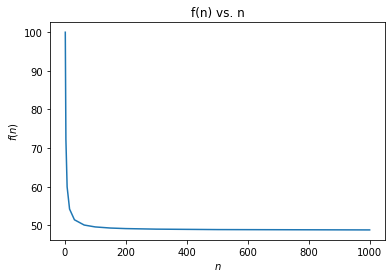

In [26]:
n_s = [2,4,8,16,32,64,100,150, 200,300,500,1000]
results = [sums_code(i) for i in n_s]
plt.plot(n_s,results)
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.title('f(n) vs. n')

**(Comparison:)** The plot of $f(n)$ shows that the function starts to converge just below 50. This is consistent with the results obtained in Part B. that shows the function starts to converge towards 48.75

**Point: 10/10**

**Problem 6**: (7pts )

Given the following sum


$$
y(n) =  \sum_{n=0}^{\infty} \frac{(-1)^{n}\pi^{2n+1}}{4^{2n+1}(2n+1)!}
$$

5a) 2pts - Determine a recurrence relation between the coefficients.

5b) 5pts - In Python, develop a tolerance based, recursive, vectorized implementation of this sum and find the limit as $n\rightarrow \infty$ of the function $y(n)$. Provide a plot to support your answer (for tolerance $10^{-4}$ and $10^{-8}$). 
 

**(Part A)**
$$\begin{aligned}
\frac{a_n}{a_{n-1}}&= \frac{\frac{(-1)^n 2^{2n+1}}{4^{2n+1}(2n+1)!}}{\frac{(-1)^{n-1} 2^{2(n-1)+1}}{4^{2(n-1)+1}(2(n-1)+1)!}}\\
& = \frac{(-1)^n\pi^{2n+1}}{4^{2n+1}(2n+1)!}\frac{4^{2n-2+1}(2n-2+1)!}{(-1)^{n-1}\pi^{2n-2+1}} \\
&= \frac{(-1)^n\pi^{2n}\pi}{4^{2n}4(2n+1)(2n)(2n-1)!}\frac{4^{2n}4^{-1}(2n-1)!}{(-1)^n(-1)^{-1}\pi^{2n}\pi^{-1}} \\
&= -\bigg(\frac{\pi}{4}\bigg)^2\frac{1}{(2n+1)(2n)}\\
a_n &= -\bigg(\frac{\pi}{4}\bigg)^2\frac{a_{n-1}}{(2n+1)(2n)}
\end{aligned}$$
$$a_0 = \frac{(-1)^0 \pi^{2(0)+1}}{4^{2(0)+1}(2(0)+1)!)}=\frac{\pi}{4}$$
$$a_n = \begin{cases}\frac{\pi}{4}, &n=0 \\
 -\bigg(\frac{\pi}{4}\bigg)^2\frac{a_{n-1}}{(2n+1)(2n)}, &n \geq 1
\end{cases}$$

**(Part B)**

In [27]:
def vec_recursion_sum(tol):
    n0=0
    n=1
    an = np.pi/4
    sum_vec = np.array([an])
    nvals = np.array([n0])
    while np.max(np.abs(an))>=tol:
        nvals = np.append(nvals,n)
        an *= - ((np.pi/4.)**2)/((2*n+1)*(2*n))
        n +=1
        sum_vec = np.append(sum_vec,an)
    sums = sum(sum_vec)
    plt.plot(nvals,sum_vec,label ='tolerance = %1.0e'%tol)
    plt.xlabel('n')
    plt.ylabel('y(n) sum value')
    plt.legend(loc=(.5,.75))
    plt.title('$y(n)$ with tolerance = %1.0e \n $y(n) = $ %1.5f'%(tol,sums))
    return sums

0.7071064695751781

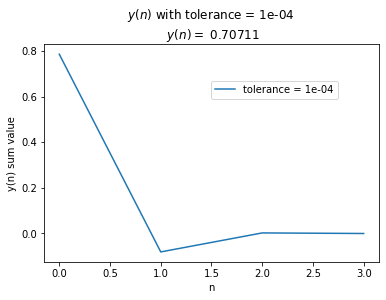

In [28]:
vec_recursion_sum(1e-4)

0.7071067811796194

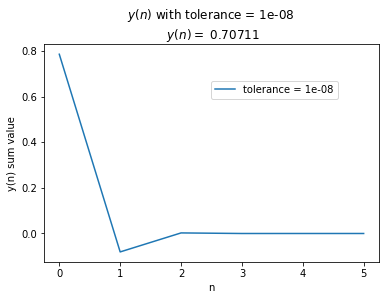

In [29]:
vec_recursion_sum(1e-8)

# Problem 6b note

array([0.78539816, 0.76521179, 0.77938894, 0.78252494, 0.78371956,
       0.78429863, 0.78462253, 0.78482183, 0.78495313, 0.78504418,
       0.78510989])

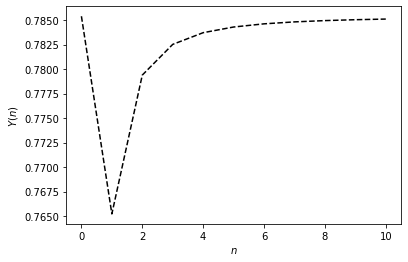

In [30]:
#Problem 6b solution - using a recursive vectorized based approach.
#I realize the wordings for Problem 6b is confusing. 
#We don't need tolerance based approach since we are summing to N. 
#This was not stated when I uploaded the Midterm. 
# Therefore, we won't count problem 6b towards the midterm grade. 

def mysum2(N): # N should be greater than or equal to 1
        x = np.linspace(0,int(N),int(N)+1)
        YN = np.ones(x.size)
        YN[0] = np.pi/4.
        pisqrd = (-1.)*np.pi**2
        n=0
        while n < x.size-1:
            n+=1
            aj=np.pi/4.
            tot = np.pi/4
            j=1
            while j <= int(x[n]):
                aj*= pisqrd/(64*(4*n**2+2*n))
                tot +=aj
                j+=1
            YN[n] = tot
        plt.plot(x,YN,color='k', ls='--')
        plt.xlabel('$n$')
        plt.ylabel('$Y(n)$')
        return YN  

mysum2(10)

**Point: 2/2**

**Problem 7**: (10pts )

A bullet of $M=2gm$ has been shot vertically into the air and is descending at its terminal speed. The terminal speed is determined by $gM= D_{drag}$ where $g$ is gravity and $M$ is mass, and may be written after evaluating the constants as 

$$
    \frac{(2)(9.81)}{1000} = 1.4 \times 10^{-5}v^{1.5} + 1.15 \times 10^{-5} v^2
$$

 where $v$ is the terminal velocity, $m/sec$. The first term on the right side represents the friction drag, and the second term represents the pressure drag. 
 
 Determine the terminal velocity by the bisection method with a tolerance of 0.01.

$$\begin{aligned}
    \frac{(2)(9.81)}{1000} &= 1.4 \times 10^{-5}v^{1.5} + 1.15 \times 10^{-5} v^2 \\
    0 &=  1.4 \times 10^{-5}v^{1.5} + 1.15 \times 10^{-5} v^2 - \frac{(2)(9.81)}{1000}\\
    0 &=  1.4 \times 10^{-5}v^{1.5} + 1.15 \times 10^{-5} v^2 - 0.01962
\end{aligned}$$

In [31]:
def bisection_root_finder(f,a,b,tol):
    f_a = f(a)
    f_b = f(b)
    if f_a*f_b<0:
        c=(a+b)/2
        guesses = np.array([c])
        f_c = f(c)
        while np.abs(f_c)>=tol:
            if f_a*f_c<0:
                b=c
            else:
                a=c
            c=(a+b)/2
            guesses=np.append(guesses,c)
            f_c = f(c)
            
        print("Terminal velocity is v = %1.3f m/s" %c)
        
    else:
        print("Unable to find terminal velocity in these bounds")

In [32]:
vel = lambda v: 1.4e-5*v**(1.5)+ 1.15e-5*v**2 - 0.01962
bisection_root_finder(vel,15,60,0.01)

Terminal velocity is v = 37.500 m/s


**Point: 10/10**

**Problem 8**: (14pts )

The natural logarithm is defined as an integral,

$$
\ln(x) = \int_1^x \frac{1}{t} \ dt
$$

(a) Using the trapezoid rule, write a program to  find approximations to $\ln(x)$.

(b) Show that using the trapezoid rule on the integral  for  $\ln(x)$ results in the following series approximation (for $x \in$ [1,2])
$$
\ln(x) \approx  \frac{x^2-1}{2nx} + \sum_{k=1}^{n-1} \frac{x-1}{n+k(x-1)}
$$

(c) Using the following series approximation for $\ln(x)$, write a program to find approximations to $\ln(x)$.
$$
\ln(x) \approx  \frac{x^2-1}{2nx} + \sum_{k=1}^{n-1} \frac{x-1}{n+k(x-1)}
$$

(d) Using your program in 8(a) and 8(c) find the value of $\ln(2)$.

**(Part A)**

In [33]:
def natural_log_trapezoid(x,N,f):
    exes = np.linspace(1,x,int(N)+1)
    fx= f(exes)
    dx = (x-1)/N
    return dx/2.*(fx[0] + fx[int(N)] + 2.*np.sum(fx[1:int(N)]))

**(Part B)**


The Trapezoid Rule can be approximated by:
$$\int_a^b f(x) \hspace{1pt}dx \approx \frac{\delta x}{2}\bigg[f(a) +f(b) +2\sum_{j=1}^{N-1}f(x_j) \bigg]$$
Given that,
$$\ln (x) = \int_1^x \frac{1}{t}dt$$
We define,
$$\begin{aligned}
a &= 1,\\
b &=x, \\
\delta x &= \frac{x-1}{n}, \\
x_j & = 1+ \frac{k(x-1)}{n}\\
&= \frac{n+k(x-1)}{n}
\end{aligned}$$
Then,
$$\begin{aligned} 
\ln (x) &= \int_1^x \frac{1}{t}dt\\
& \approx \frac{\delta x}{2}\bigg[\frac{1}{1} + \frac{1}{x} +2 \sum_{k=1}^{n-1}\frac{1}{x_j} \bigg] \\
& \approx \frac{x-1}{2n}\bigg[ \frac{x+1}{x} + 2\sum_{k=1}^{n-1}\frac{1}{\frac{n+k(x-1)}{n}}\bigg] \\
& \approx \frac{x-1}{2n}\bigg[ \frac{x+1}{x} + 2\sum_{k=1}^{n-1}\frac{n}{n+k(x-1)}\bigg] \\
& \approx  \frac{(x+1)(x-1)}{2nx} + \sum_{k=1}^{n-1}\frac{x-1}{n+k(x-1)} \\
& \approx  \frac{x^2 - 1}{2nx} + \sum_{k=1}^{n-1}\frac{x-1}{n+k(x-1)} \\
\end{aligned}$$

In [34]:
def natural_log_sum(x,n):
    sums = 0
    for k in range(1,int(n)):
        sums +=(x-1)/(n+k*(x-1))
    return (x**2-1)/(2*n*x) + sums

**(Part D)**

In [35]:
print(np.log(2))

0.6931471805599453


In [36]:
func = lambda t: 1/t
z = natural_log_trapezoid(2,1e6,func)
print(z)

0.6931471805600075


In [37]:
zedd = natural_log_sum(2,1e6)
print(zedd)

0.6931471805600136


**Point: 14/14**

**Problem 9**: (5 pts) 
    
i) [8 points] Write a python program to find the **cubic root** of a number based on Newton method.

ii) [2 points] Using your program in i), compute the root of $a=155$

**(Part i)** 
We want to find the cubic root of a number $a$.
We can write, for an arbitrary n:
$$x^3 = a $$ 
Then,
$$0 = x^3 - a$$
We will denote $f(x)$ as :
$$f(x) = x^3 - a$$
Then the derivative is given by:
$$f'(x) = 3x^2$$

In [38]:
def Newton_cubic(f,df,x0,a,tol):
    x1 =  x0 -f(x0,a)/df(x0)
    
    while np.abs(x1-x0)>=tol:
        x0 = x1
        x1 = x0 -f(x0,a)/df(x0)
    
    print("The cubic root of %d is %1.4f" %(a,x1))


**(Part ii)**

In [39]:
fx = lambda x, a: x**3 - a
dfx = lambda x: 3*x**2

Newton_cubic(fx,dfx,4,155,1e-4)

The cubic root of 155 is 5.3717


**Point: 5/5**

Good job!

**Total: 85/85**